# kNN算法
## 2.2示例：使用k-近邻算法改进约会网站的配对效果
#### 1.收集数据：提供文本文件
#### 2.准备数据：使用Python解析文本文件
#### 3.分析数据：使用Matplotlib画二维扩散图
#### 4.训练算法：此步骤不适用于k-近邻算法
#### 5.测试算法：使用海伦提供的部分数据作为测试样本
#### 6.使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型

### 2-1 k-近邻算法

In [31]:
import numpy as np
import operator
from os import listdir

In [32]:
def classify0(inX, dataSet, labels, k): # inX 已知的一个样本类别
    dataSetSize = dataSet.shape[0]  # numpy函数shape[0]返回dataSet的行数
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet  # #在列向量方向上重复inX共1次()，行向量方向上重复inX共dataSetSize次(纵向)
    sqDiffMat = diffMat**2   #二维特征相减后平方   如：(x-x1)**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()  # 返回distances中元素从小到大排序后的索引值
    classCount={}   # 定一个记录类别次数的字典
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]   
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1   #字典的get()方法,返回指定键的值,如果值不在字典中返回默认值
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True) # 1 表示根据字典的值进行排序  reverse降序排序字典
    return sortedClassCount[0][0]

### 2-2将文本记录转化为Numpy的解析程序

In [33]:
import numpy as np
def file2matrix(filename):
    love_dictionary = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}  # !! ValueError: invalid literal for int() with base 10: 'largeDoses'
    fr = open(filename)   
    arrayOfLines = fr.readlines() #读取文件内容
    numberOfLines = len(arrayOfLines)  # 得到文件行数
    returnMat = np.zeros((numberOfLines,3))  # 没有numpy,格式numpy.zeros( (m,n) )
    classLabelVector = []  #返回的分类标签向量
    index = 0  # 初始化行的索引值
    for line in arrayOfLines:
        line = line.strip()  # 删除空白符
        listFromLine = line.split('\t')  # 将字符串根据'\t'分隔符进行切片。
        returnMat[index, :] = listFromLine[0:3]   # 将数据前三列提取出来,存放到returnMat，得到特征矩阵
        #classLabelVector.append(int(listFromLine[-1]))  # 把ifelse 语句换成此剧  （这是原始的句子）
        if listFromLine[-1].isdigit():  # 判断切片后得到的数据最后一列 is num or not 
            classLabelVector.append(int(listFromLine[-1]))  # 是数字的话，添加到分类标签向量，像 [3,1,2,3,1,2] 数字代表含义见第三行
        else:  
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))   # 不是数字的话，根据love_dictionary 的键 找对应的 值 [1,2,3]
        
        index += 1
    return returnMat, classLabelVector   # 返回 特征矩阵， 分类向量

In [34]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
print(datingDataMat)
print(datingLabels[0:20])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


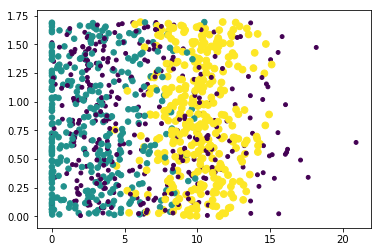

In [35]:
import matplotlib  # 导入matplotlib
import numpy as np 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
## ax.scatter(datingDataMat[:,1], datingDataMat[:,2])  # 取消注释看黑白结果
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))  # !!原始的是15.0*array()
plt.show()
# plt.show()  运行第一次出现 图所在的位置， 运行第二次 出现可视化图像

### 2-3归一化特征值

In [36]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))  # !! 原始   zeros(shape(dataSet))  返回dataSet的矩阵行列数
    m = dataSet.shape[0]  # 返回dataSet的行数  0 表 行， 1 表 列
    normDataSet = dataSet - np.tile(minVals, (m,1))  # !! 原始 /tile(ranges, (m,1))  # 原始值减去最小值
    normDataSet = normDataSet/np.tile(ranges, (m,1))  # !! 原始 /tile(ranges, (m,1))  # 除以最大和最小值的差
    return normDataSet, ranges, minVals  # 返回归一化数据结果,数据范围,最小值

In [37]:
normMat, ranges, minVals = autoNorm(datingDataMat)
print('normMat=',normMat)
print('ranges=',ranges)
print('minVals=',minVals)

normMat= [[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
ranges= [9.1273000e+04 2.0919349e+01 1.6943610e+00]
minVals= [0.       0.       0.001156]


### 2-4分类器针对约会网站的测试代码

In [38]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')  #  返回 特征矩阵， 分类向量
    normMat, ranges, minVals = autoNorm(datingDataMat)  # 返回归一化数据结果,数据范围,最小值
    m = normMat.shape[0]  # 获得normMat的行数
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0  # 错误计数
    for i in range(numTestVecs):   # 前numTestVecs个数据作为测试集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:  # 判断机器分类结果如果出错， 则 errorCount 加 1
            errorCount += 1.0
    # print("the error is:", errorCount)  # test the value of error
    print("the total error rate is:%f" % (errorCount/float(numTestVecs)))  # 打印错误率

In [39]:
datingClassTest()  # 太多行了 隐藏起来 点击空白处 查看结果    # 隐藏方法 Cell->Current Outputs->Toggle

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

### 2-5约会网站预测函数

In [40]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']  # 输出结果
    percentTats = float(input("percentage of time spent playing video game ?"))  # 三维特征用户输入
    ffMiles = float(input("frequent filer miles earned per year ?"))  # 同上
    iceCream = float(input("liters of ice cream consumed per year ?"))  # 同上
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt') # 返回 特征矩阵， 分类向量
    normMat, ranges, minVals = autoNorm(datingDataMat)  # 返回归一化数据结果,数据范围,最小值
    inArr = np.array([ffMiles, percentTats, iceCream])  # 生成NumPy数组，用于测试
    classifierResult = classify0((inArr-minVals)/ranges,normMat, datingLabels,3)
    print("you will probably like this person :", resultList[classifierResult - 1])

In [41]:
classifyPerson()

percentage of time spent playing video game ?1000
frequent filer miles earned per year ?1000
liters of ice cream consumed per year ?10
you will probably like this person : not at all


## 2.3 示例：手写识别系统
### 2.3.1 准备数据：将图像转化为测试向量

In [42]:
import numpy as np
import operator

In [43]:
def classify0(inX, dataSet, labels, k): # inX 已知的一个样本类别  注释同上
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [44]:
def img2vector(filename):
    returnVect =  np.zeros((1,1024))  # 将32x32的图像转化为1x1024的向量

    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

### 2-6 手写数字识别系统的测试代码
#### 使用KNN进行手写体识别的时候，先把数据文件和.ipy文件放在同一目录下，万一出现FileNotFoundError: [Errno 2] No such file or directory: ‘traingingDigits/0_0.txt’.
#### 找不到文件的情况，则可以将程序中的文件路径改为绝对路径。 形式类似于'D:/xxx/xxx/xx/'

In [45]:
def handwritingClassTest():
    hwLabels = []  
    trainingFileList = os.listdir('C:/Users/DELL/pythonFolder/trainingDigits/')  # 不知道怎样加载文件夹（文本文件实在太多！！！） 答案见上
    m = len(trainingFileList) # 获取训练集的长度
    trainingMat = np.zeros((m,1024))  # 创建训练矩阵   m 行 1024 列     一行 代表一个训练文件  像  0_0.txt
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('C:/Users/DELL/PythonFolder/trainingDigits/%s' % fileNameStr)
    testFileList = os.listdir('C:/Users/DELL/PythonFolder/testDigits/')  
    errorCount = 0.0   # os.listdir() 方法用于返回指定的文件夹包含的文件或文件夹的名字的列表(加载测试集)
    mTest = len(testFileList) # 获取测试集的长度
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('C:/Users/DELL/PythonFolder/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifierResult came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if classifierResult != classNumStr:
            errorCount += 1.0
    print("\nthe total number of errors is: %d " % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [30]:
handwritingClassTest()  # 太多行了 隐藏起来 点击空白处 查看结果

the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the classifierResult came back with: 0, the real answer is: 0
the clas

the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the classifierResult came back with: 1, the real answer is: 1
the clas

the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 2, the real answer is: 2
the classifierResult came back with: 3, the real answer is: 3
the classifierResult came back with: 3, the real answer is: 3
the classifierResult came back with: 3, the real answer is: 3
the classifierResult came back with: 9, the real answer is: 3
the classifierResult came back with: 3, the real answer is: 3
the classifierResult came back with: 3, the real answer is: 3
the classifierResult came back with: 3, the real answer is: 3
the classifierResult came back with: 3, the real answer is: 3
the clas

the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the classifierResult came back with: 4, the real answer is: 4
the clas

the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the classifierResult came back with: 5, the real answer is: 5
the clas

the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the classifierResult came back with: 7, the real answer is: 7
the clas

the classifierResult came back with: 1, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the classifierResult came back with: 8, the real answer is: 8
the clas

the classifierResult came back with: 9, the real answer is: 9
the classifierResult came back with: 9, the real answer is: 9
the classifierResult came back with: 9, the real answer is: 9
the classifierResult came back with: 9, the real answer is: 9
the classifierResult came back with: 9, the real answer is: 9
the classifierResult came back with: 9, the real answer is: 9

the total number of errors is: 11 

the total error rate is: 0.011628
